In [1]:
from simulator import Sim
from strategy1 import Strategy
from strategy1 import *
from get_info import get_pnl
from load_data import load_md_from_file


import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
PATH_TO_BTC = r'C:\Users\walkr\Documents\HFT\HFT\simulator\data\BTC'
PATH_TO_ETH = r'C:\Users\walkr\Documents\HFT\HFT\simulator\data\ETH'

T = pd.Timedelta(1, 'h').delta
md_btc = load_md_from_file(path=PATH_TO_BTC, T=T)
md_eth = load_md_from_file(path=PATH_TO_ETH, T=T)
latency = pd.Timedelta(10, 'ms').delta
md_latency = pd.Timedelta(10, 'ms').delta

In [3]:
delay = pd.Timedelta(0.1, 's').delta
hold_time = pd.Timedelta(2, 's').delta

sim_btc = Sim(md_btc, latency, md_latency)
sim_eth = Sim(md_eth, latency, md_latency)

In [4]:
sigma_btc = 28.267183019829968
sigma_eth = 2.5749407232019585
rho = 0.82513964

In [5]:
gamma = 7
big_delta_btc = 2
big_delta_eth = 1 #1
A = 0.8
ksi = 1.8
k = 8
intensity_btc = 5
intensity_eth = 5

E = E_f(sigma_btc, sigma_eth, rho)
big_gamma = big_gamma_f(E, A, k, big_delta_btc, ksi, A, k, big_delta_eth, ksi)

In [6]:
strategy = Strategy(delay, hold_time,
                    gamma, big_gamma, ksi, intensity_btc, intensity_eth,
                    big_delta_btc, big_delta_eth, A, k
                    )
trades_list_btc, md_list_btc, updates_list_btc, all_orders_btc, trades_list_eth, md_list_eth, updates_list_eth, all_orders_eth = strategy.run(sim_btc, sim_eth)

# PNL BTC

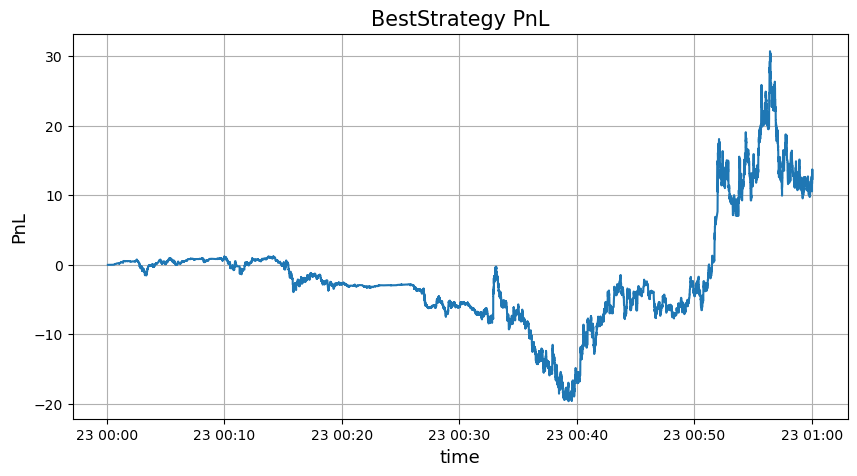

In [7]:
df = get_pnl(updates_list_btc)

dt = pd.to_datetime(df.receive_ts)

plt.figure(figsize=(10, 5))
plt.plot(dt, df.total, '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("PnL", fontsize=13)
plt.title("BestStrategy PnL", fontsize=15)
plt.grid()
plt.show()


# BTC position

<AxesSubplot: >

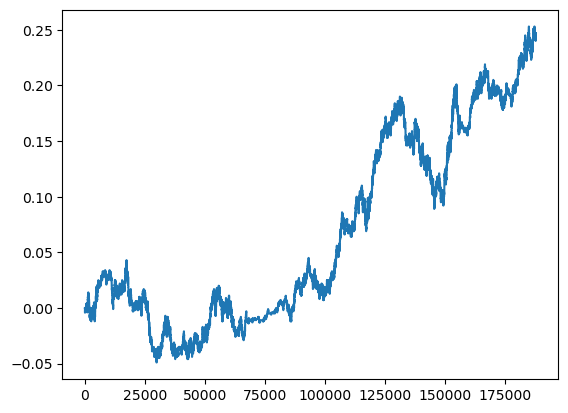

In [8]:
(df["BTC"]).plot()

# PNL ETH

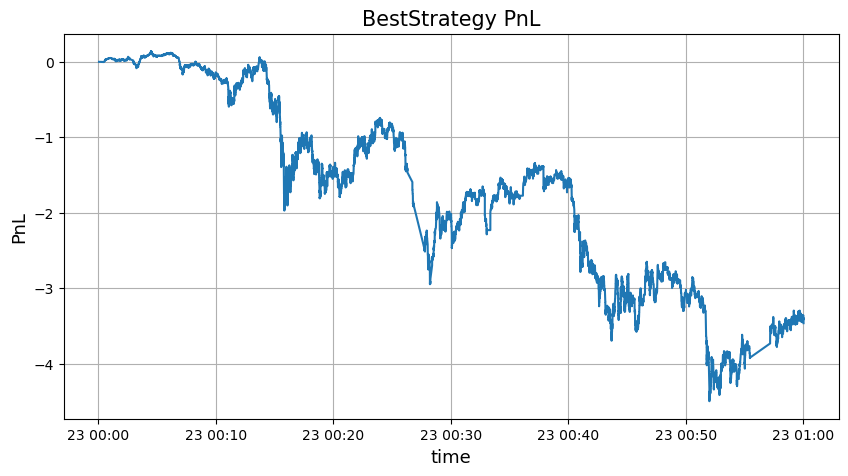

In [9]:
df = get_pnl(updates_list_eth)

dt = pd.to_datetime(df.receive_ts)

plt.figure(figsize=(10, 5))
plt.plot(dt, df.total, '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("PnL", fontsize=13)
plt.title("BestStrategy PnL", fontsize=15)
plt.grid()
plt.show()

# ETH Position

<AxesSubplot: >

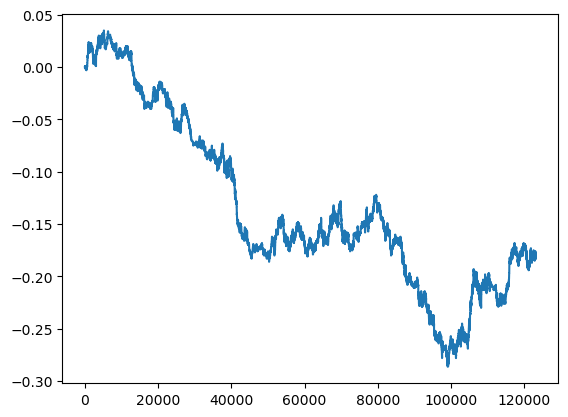

In [10]:
(df["BTC"]).plot()

# Traded volumes BTC (ASK, BID)

<AxesSubplot: xlabel='time'>

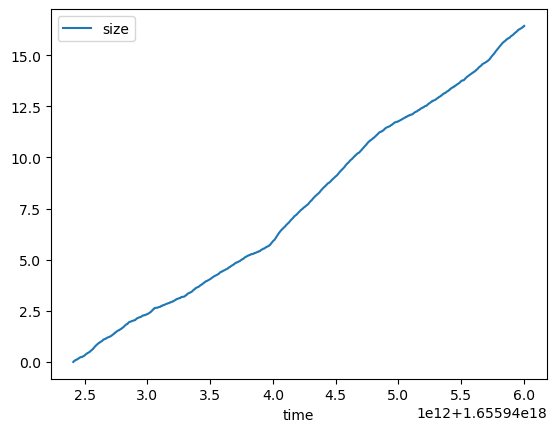

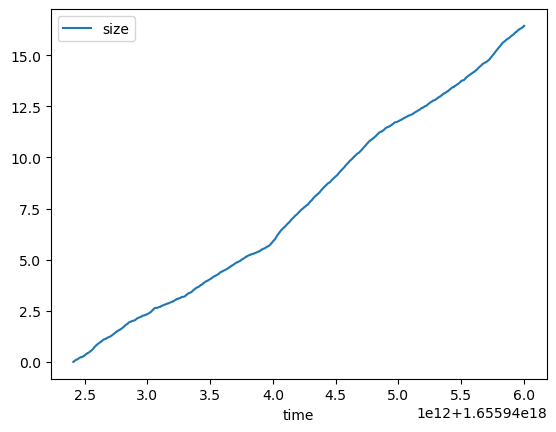

In [11]:
trades = {"time":[], "size": [], "side": []}
for trade in trades_list_btc:
    trades["time"].append(trade.exchange_ts)
    trades["size"].append(trade.size)
    trades["side"].append(trade.side)

trades = pd.DataFrame(trades)
trades["size"] = trades["size"].cumsum()
trades[(trades["side"]=="ASK") | (trades["side"]=="BID")].set_index("time").plot()
trades[trades["side"]=="BID"].set_index("time").plot()


# Traded volumes ETH (ASK, BID)

<AxesSubplot: xlabel='time'>

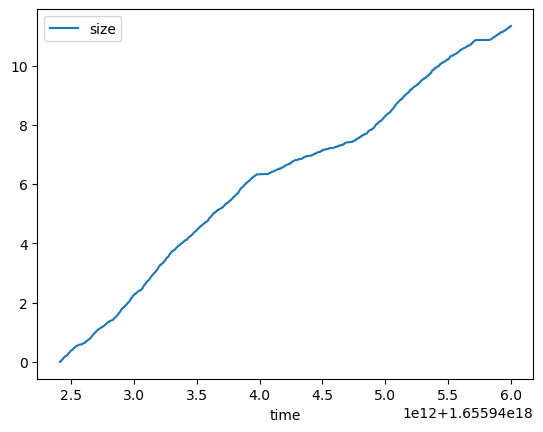

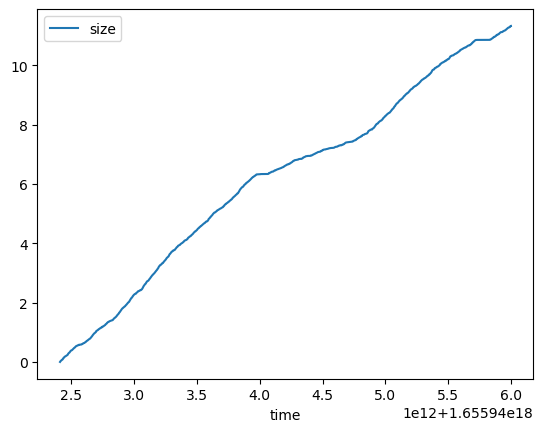

In [12]:
trades = {"time":[], "size": [], "side": []}
for trade in trades_list_eth:
    trades["time"].append(trade.exchange_ts)
    trades["size"].append(trade.size)
    trades["side"].append(trade.side)

trades = pd.DataFrame(trades)
trades["size"] = trades["size"].cumsum()
trades[(trades["side"]=="ASK") | (trades["side"]=="BID")].set_index("time").plot()
trades[trades["side"]=="BID"].set_index("time").plot()
